In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


In [2]:
source('/oak/stanford/groups/mrivas/users/ytanigaw/repos/rivas-lab/ukbb-tools/04_gwas/check_gwas/plots/gwas_plot_misc.R')


In [6]:
annot_f <- '/scratch/groups/mrivas/ukbb24983/cal/annotation_20201002/ukb24983_cal_cALL_v2_hg19.vep101-loftee.Csq.tsv.gz'

snpnet_betas_f <- '/oak/stanford/groups/mrivas/projects/PRS/private_output/20200908_PRS_map_test/7_pfactor_v5/HC382/2_refit/snpnet.tsv'


In [4]:
fread(annot_f, select=c('#CHROM', 'POS', 'ID', 'Allele', 'Csq', 'Consequence', 'SYMBOL', 'gnomAD_AF', 'LoF')) %>%
rename('CHROM'='#CHROM') %>%
mutate(CHROM=if_else(CHROM == 'XY', 'X', CHROM)) %>%
compute_gwas_plot_df() -> annot_df


In [7]:
snpnet_betas_f %>% fread() %>% select(-CHROM, -POS) %>% left_join(annot_df, by='ID') -> df



In [30]:
df%>%
mutate(
    SYMBOL = if_else(is.na(POScum), ID, SYMBOL),
    Csq    = if_else(is.na(POScum), 'pav', Csq),
    POScum = if_else(is.na(POScum), 1094272075, POScum)
) %>%
replace_na(list(SYMBOL='')) %>%
mutate(repel_label = if_else(
    rank(-abs(BETA)) <= 30 | (ID %in% (df %>% filter(Csq == 'ptv') %>% filter(rank(-abs(BETA)) <= 10) %>% pull(ID))), 
    SYMBOL, ''
)) %>%
plot_lake() + 
labs(title='Asthma')+
theme(
    title = element_text(size=16),
    legend.title = element_text(size=12),
    legend.text  = element_text(size=10),
    axis.text=element_text(size=16), 
    axis.title=element_text(size=16),
    legend.position = 'bottom'
) -> p_lake


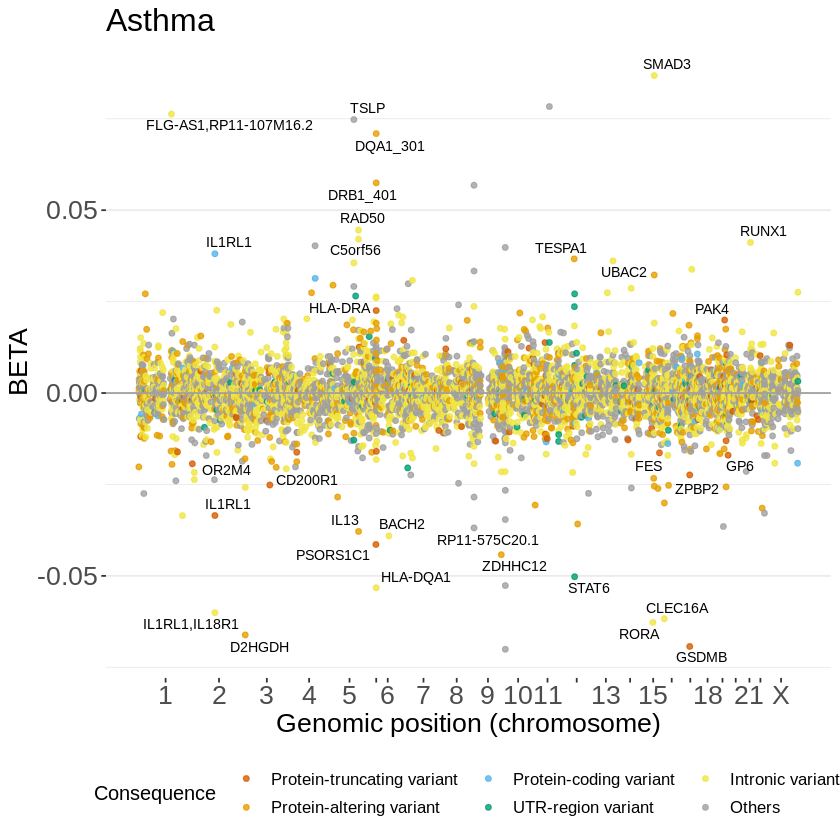

In [31]:
p_lake

In [32]:
ggsave('plots/p_lake.HC382.pdf', p_lake, width=6, height=6)
ggsave('plots/p_lake.HC382.png', p_lake, width=6, height=6)

In [15]:
df %>% filter(is.na(POScum))%>%
head(30)

ID,REF,ALT,BETA,CHROM,POS,Allele,Csq,Consequence,SYMBOL,gnomAD_AF,LoF,POScum
<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
A_201,N,P,-0.004574449,NA,NA,NA,NA,NA,NA,NA,NA,NA
DRB1_401,N,P,0.057464900,NA,NA,NA,NA,NA,NA,NA,NA,NA
DQA1_301,N,P,0.070936530,NA,NA,NA,NA,NA,NA,NA,NA,NA
DPA1_201,N,P,0.019093980,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [21]:
df %>%
filter(Csq == 'pav') %>%
filter(rank(-abs(BETA)) <= 10) %>%
arrange(POScum)

ID,REF,ALT,BETA,CHROM,POS,Allele,Csq,Consequence,SYMBOL,gnomAD_AF,LoF,POScum
<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
rs1106639,G,A,-0.06613650,2,242690675,A,pav,missense_variant,D2HGDH,0.24240,NA,491913202
rs16903574,C,G,0.02949103,5,14610309,G,pav,missense_variant,FAM105A,0.05642,NA,895637092
rs20541,A,G,-0.03784061,5,131995964,G,pav,missense_variant,IL13,0.72060,NA,1013022747
rs11539209,T,A,-0.04419793,9,131483551,A,pav,missense_variant,ZDHHC12,0.07388,NA,1669537058
rs4909945,T,C,-0.03063930,11,10673739,C,pav,missense_variant,MRVI1,0.76240,NA,1825269411
rs62623446,C,T,0.03668375,12,55368291,T,pav,missense_variant,TESPA1,0.04459,NA,2004909083
rs3763978,C,G,-0.03580887,12,71533534,G,pav,missense_variant,TSPAN8,0.32940,NA,2021074326
rs35874463,A,G,0.03227504,15,67457698,G,pav,missense_variant,SMAD3,0.03962,NA,2373220622
rs4238608,G,A,-0.03006164,16,11541896,A,pav,missense_variant,CTD-3088G3.8,0.81080,NA,2419702137


In [19]:
df %>%
filter(Csq == 'ptv') %>%
filter(rank(-abs(BETA)) <= 10) %>%
arrange(POScum)

ID,REF,ALT,BETA,CHROM,POS,Allele,Csq,Consequence,SYMBOL,gnomAD_AF,LoF,POScum
<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
Affx-52323328,AC,A,-0.01934651,1,248402757,-,ptv,frameshift_variant,OR2M4,NA,HC,248402757
Affx-52334280,TC,T,-0.03349498,2,102968209,-,ptv,frameshift_variant,IL1RL1,NA,HC,352190736
rs199845196,GT,G,-0.02514694,3,112648126,-,ptv,frameshift_variant,CD200R1,NA,HC,604912064
Affx-89026413,C,CC,-0.04140552,6,31106501,C,ptv,frameshift_variant,PSORS1C1,NA,HC,1092831697
rs8084,A,C,0.02253908,6,32411035,C,ptv,splice_acceptor_variant,HLA-DRA,6.113e-01,HC,1094136231
rs11330240,CT,C,-0.01634593,15,91428521,-,ptv,frameshift_variant,FES,2.779e-01,NA,2397191445
Affx-52331281,AG,A,-0.02239648,17,38028633,-,ptv,frameshift_variant,ZPBP2,NA,HC,2536358969
rs11078928,T,C,-0.06929087,17,38064469,C,ptv,splice_acceptor_variant,GSDMB,3.989e-01,HC,2536394805
rs4803206,T,C,0.01996639,19,39616521,C,ptv,splice_donor_variant,PAK4,1.994e-01,LC,2697065719


In [18]:
df %>%
filter(Csq == 'ptv') %>%
filter(rank(-abs(BETA)) <= 10) %>%
arrange(POScum) %>%
select(CHROM, POS, ID, BETA, SYMBOL, Consequence) %>%
rename('#CHROM' = 'CHROM') %>%
fwrite('plots/p_lake.HC382.tsv', sep='\t', na = "NA", quote=F)


In [33]:
df %>% dim()

[1] 6430   13

In [16]:
df %>% count(Csq)

Csq,n
<chr>,<int>
intron,2700
others,2553
pav,882
pcv,57
ptv,135
utr,99
NA,4


In [8]:
df %>% arrange(POScum) %>%
arrange(-abs(BETA)) %>%
head(30)

ID,REF,ALT,BETA,CHROM,POS,Allele,Csq,Consequence,SYMBOL,gnomAD_AF,LoF,POScum
<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
rs17293632,C,T,0.08678666,15,67442596,T,intron,intron_variant,SMAD3,NA,NA,2373205520
rs61893460,G,A,0.07833492,11,76291154,A,others,regulatory_region_variant,NA,NA,NA,1890886826
rs12123821,C,T,0.07626338,1,152179152,T,intron,intron_variant,"FLG-AS1,RP11-107M16.2",NA,NA,152179152
rs1837253,T,C,0.07476422,5,110401872,C,others,upstream_gene_variant,TSLP,NA,NA,991428655
DQA1_301,N,P,0.07093653,NA,NA,NA,NA,NA,NA,NA,NA,NA
rs12413578,C,T,-0.07005978,10,9049253,T,others,regulatory_region_variant,NA,NA,NA,1688204699
rs11078928,T,C,-0.06929087,17,38064469,C,ptv,splice_acceptor_variant,GSDMB,0.39890,HC,2536394805
rs1106639,G,A,-0.06613650,2,242690675,A,pav,missense_variant,D2HGDH,0.24240,NA,491913202
rs11071559,C,T,-0.06271826,15,61069988,T,intron,intron_variant,RORA,NA,NA,2366832912
